In [35]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from tensorflow.keras.datasets import mnist

ERROR! Session/line number was not unique in database. History logging moved to new session 375


In [37]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [38]:
single_image=x_train[0]

In [39]:
single_image.shape

(28, 28)

In [40]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

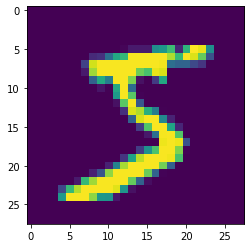

In [41]:
plt.imshow(single_image)

In [42]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
y_example=to_categorical(y_train)

In [45]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [46]:
y_cat_test=to_categorical(y_test)

In [47]:
y_cat_train=to_categorical(y_train)

In [48]:
x_train=x_train/255

In [49]:
x_test=x_test/255

In [50]:
scaled_image=x_train[0]

In [51]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

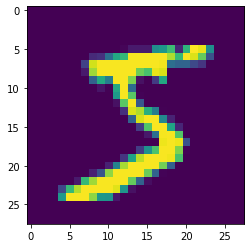

In [52]:
plt.imshow(scaled_image)

In [53]:
x_train=x_train.reshape(60000,28,28,1)

In [54]:
x_test=x_test.reshape(10000,28,28,1)

In [55]:
from tensorflow.keras.models import Sequential

In [56]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [57]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
#op
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [60]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 247us/sample - loss: 0.1390 - accuracy: 0.9584 - val_loss: 0.0576 - val_accuracy: 0.9816
Epoch 2/10
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0525 - val_accuracy: 0.9824
Epoch 3/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0437 - val_accuracy: 0.9863
Epoch 4/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 5/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0412 - val_accuracy: 0.9888


In [61]:
metrics = pd.DataFrame(model.history.history)

In [62]:
metrics 

,loss,accuracy,val_loss,val_accuracy
0,0.138956,0.958400,0.057645,0.9816
1,0.048121,0.984883,0.052513,0.9824
2,0.031226,0.990250,0.043664,0.9863
3,0.021461,0.993333,0.036997,0.9883
4,0.014477,0.995083,0.041184,0.9888


<AxesSubplot:>

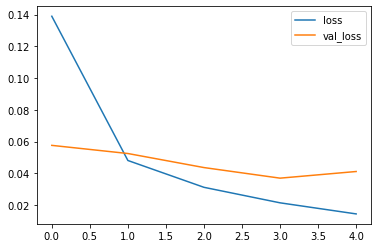

In [63]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

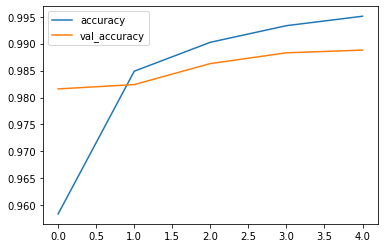

In [64]:
metrics[['accuracy','val_accuracy']].plot()

In [65]:
model.metrics_names

['loss', 'accuracy']

In [66]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.041184429115219974, 0.9888]

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
predictions = model.predict_classes(x_test)

ERROR! Session/line number was not unique in database. History logging moved to new session 376


In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [71]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    1,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1129,    2,    1,    0,    0,    1,    1,    1,    0],
       [   1,    0, 1026,    0,    0,    0,    1,    3,    1,    0],
       [   0,    0,    2, 1003,    0,    2,    0,    2,    1,    0],
       [   0,    0,    1,    0,  972,    0,    5,    0,    0,    4],
       [   2,    1,    1,    5,    0,  877,    3,    0,    2,    1],
       [   5,    1,    0,    0,    1,    0,  950,    0,    1,    0],
       [   1,    1,    8,    0,    0,    0,    0, 1016,    1,    1],
       [   4,    0,    6,    2,    0,    1,    3,    5,  949,    4],
       [   2,    0,    1,    1,    5,    1,    1,    6,    1,  991]],
      dtype=int64)

In [72]:
import seaborn as sns

<AxesSubplot:>

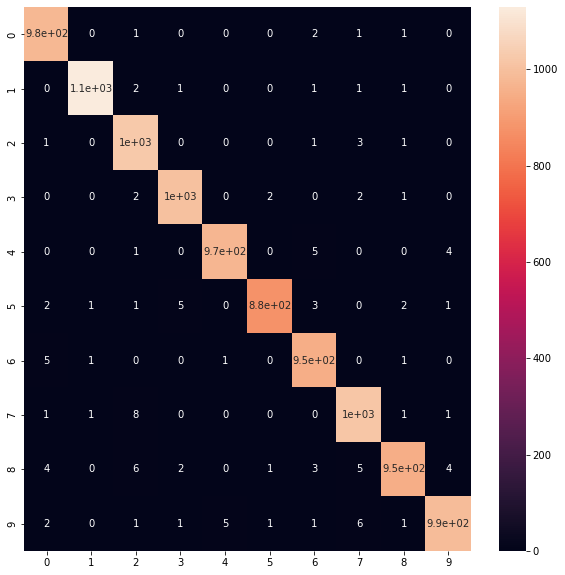

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

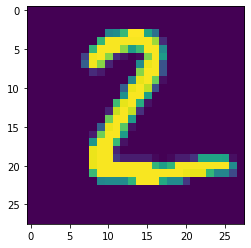

In [75]:
my_num=x_test[1]
plt.imshow(my_num.reshape(28,28))

In [76]:
model.predict_classes(my_num.reshape(1,28,28,1))

array([2], dtype=int64)